# Quiz 2 #

**Nome:**  Edson Roteia e João Pedro Moreira Ferreira

### First estimation - Manual Calculating from single image###

- Configuration for naive estimation

![](./imgs/chess.jpg.png)

- Size in pixel of the book:
   - width: 870px
   - heigth: 696px
   

From the equations:
$f_x = \frac{d_x}{d_X} d_z, f_y = \frac{d_y}{d_Y} d_z $ (1)

We have:
$f_x = \frac{870}{294} 1200, f_y = \frac{696}{234}1200$

So:
$f_x = 3551.02, f_y = 3569.23$

### Second estimation - Using MATLAB App (Camera Calibrator)###

- Input images to estimate camera parameters

![](./imgs/input_matlab.png)


- Camera Calibrator App for MATLAB

![](./imgs/app.png)


- Camera parameters estimate by the MATLAB App

![](./imgs/matlab_5.png)

The Camera Calibrator MATLAB App Estimate the follow parameters:
   - Intrisic Parameters:
    
   - Extrinsic Parameters:
   
![](./imgs/extrinsicfinal.png)

### Last Estimation - Using SVD 

#### 1. Measure the 3-D coordinates of each vector of the n squares on the calibration pattern in the world reference frame.

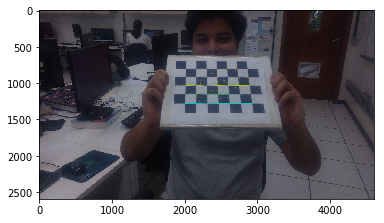

In [72]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


##read images
# images_name = ['./imgs/IMG_20190404_153953657.jpg','./imgs/IMG_20190404_153954488.jpg','./imgs/IMG_20190404_154000947.jpg',
#               './imgs/IMG_20190404_154002764.jpg','./imgs/IMG_20190404_154004200.jpg']
images_name = ['./imgs/IMG_20190404_153953657.jpg']
images = []
for img_name in images_name:
    img = cv2.imread(img_name)
    images.append(img)

##find chessboard
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 28, 0.001)
objp = np.zeros((5*7,3), np.float32)
objp[:,:2] = np.mgrid[0:7,0:5].T.reshape(-1,2)

objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.





# 8. Set up A and b of system (6.14), and use (6.15) to estimate T_{z} and f_{x}
#      - The output is formed by alpha, f_{x}, and the extrinsic parameters of the viewing camera.
for img in images:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (7,5), None)
    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)
        corners2 = cv2.cornerSubPix(gray,corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners)
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (7,5), corners2, ret)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

#### 2. Find the coordinates in the image reference frame of each of the N vertices.

In [100]:
#####POINTS IN THE WORLD##########
worldpoints = []
#points in 1,2,3,4,5,6,7
# worldpoints = objpoints
#points i1n 0.028,0.056,0.084,0.112,0.140,0.168
for points in objpoints:
    worldpoints.append(points * 28)

#### 3. Having the N correspondences between image and world points, compute the SVD of A (6.8). The solution is the column of V corresponding to the smallest singular value of A.
![](./imgs/trucco6.8.png)

In [129]:
# Create A matrix
A = []
for worldpoint_vector,imagepoint_vector in zip(worldpoints,imgpoints):
    for worldpoint, imagepoint in zip(worldpoint_vector, imagepoint_vector):
#         print(worldpoint, imagepoint)
        A_line = []
        A_line.append(imagepoint[0][0] * worldpoint[0])
        A_line.append(imagepoint[0][0] * worldpoint[1])
        A_line.append(imagepoint[0][0] * worldpoint[2])
        A_line.append(imagepoint[0][0])
        A_line.append(-imagepoint[0][1] * worldpoint[0])
        A_line.append(-imagepoint[0][1] * worldpoint[1])
        A_line.append(-imagepoint[0][1] * worldpoint[2])
        A_line.append(-imagepoint[0][1])
        A.append(A_line)
        
A = np.asarray(A)
# U, D, V = np.linalg.svd(np.dot(np.transpose(A), A), full_matrices=True)
U, D, V = np.linalg.svd(np.dot(A, np.transpose(A)), full_matrices=True)

# U, D, V = np.linalg.svd(A, full_matrices=True)
idx_min = np.argmin(D)
V_selected = U[:,idx_min]

#### 4. Determine $|\gamma|$ and $\alpha$ from (6.10) and (6.11)
![](./imgs/trucco6.10.png)
![](./imgs/trucco6.11.png)

In [130]:
gamma = (V_selected[0] ** 2 + V_selected[1] ** 2 + V_selected[2] ** 2 ) ** (1/2)
alfa = ((V_selected[4] ** 2 + V_selected[5] ** 2 + V_selected[6] ** 2 ) ** (1/2))/gamma
print(gamma, alfa)
print (idx_min,D,D[np.nonzero(D)],D[idx_min]<D[idx_min-1])
print ('-------')
print (V_selected)
print ("--------")
print (V[0][idx_min],V[1][idx_min],V[2][idx_min],V[3][idx_min])
print (V)

0.739192860996619 0.059483933257637824
34 [3.8162192e+12 4.9956658e+11 4.5922196e+09 7.5531456e+08 3.2470502e+07
 9.8173484e+04 5.5777441e+04 4.7630980e+04 4.3676281e+04 3.6267141e+04
 3.3042230e+04 3.1239666e+04 3.0021688e+04 2.6664189e+04 2.4820658e+04
 2.3303719e+04 2.1133773e+04 1.7429248e+04 1.6441529e+04 1.3435798e+04
 1.0630979e+04 1.0117434e+04 9.7492734e+03 9.6792363e+03 8.0782148e+03
 4.4622788e+03 3.9973579e+03 3.0190701e+03 2.5494929e+03 2.0388768e+03
 1.3932606e+03 1.1986301e+03 6.4309552e+02 4.6542288e+02 1.7403033e+02] [3.8162192e+12 4.9956658e+11 4.5922196e+09 7.5531456e+08 3.2470502e+07
 9.8173484e+04 5.5777441e+04 4.7630980e+04 4.3676281e+04 3.6267141e+04
 3.3042230e+04 3.1239666e+04 3.0021688e+04 2.6664189e+04 2.4820658e+04
 2.3303719e+04 2.1133773e+04 1.7429248e+04 1.6441529e+04 1.3435798e+04
 1.0630979e+04 1.0117434e+04 9.7492734e+03 9.6792363e+03 8.0782148e+03
 4.4622788e+03 3.9973579e+03 3.0190701e+03 2.5494929e+03 2.0388768e+03
 1.3932606e+03 1.1986301e+03 6.430

#### 5. Recover the first two rows of R and the two first components of T from (6.9)
![](./imgs/trucco6.9.png)

In [131]:
r = np.ones(shape=(3,3))
t = np.ones(shape=(3,1))
r[1][0] = V_selected[0]/gamma
r[1][1] = V_selected[1]/gamma
r[1][2] = V_selected[2]/gamma
t[1] = V_selected[3]/gamma
r[0][0] = (V_selected[4]/gamma)/alfa
r[0][1] = (V_selected[5]/gamma)/alfa
r[0][2] = (V_selected[6]/gamma)/alfa
t[0] = (V_selected[7]/gamma)/alfa
# print (r,t)

#### 6. Compute the third row of R as the vector product of the first two rows estimated in the previous step, and enforce the orthogonality constraint on the estimate of R through SVD decomposition.

In [132]:
#inner = 0 | dot = r[:][3]
r[2,:] = np.cross(r[0,:],r[1,:])

print (r)

print("******************")
print (np.inner(r[2,:],r[0,:]),np.inner(r[2,:],r[1,:])) 
print("******************")

[[ 0.12874225  0.6781431  -0.72356574]
 [-0.86599805  0.4532975   0.21111311]
 [ 0.47115544  0.59942734  0.64562914]]
******************
-5.551115123125783e-17 5.551115123125783e-17
******************


#### 7. Pick a point for which $(x - \sigma_{x})$ is noticeably different from 0. If inequality (6.12) is satisfied, reverse the sign of the first two rows of R and the first two components of T
![](./imgs/trucco6.12.png)

In [133]:
x_aux = imgpoints[0][1][0][0] * (r[0][0] * worldpoints[0][1][0] + r[0][1] * worldpoints[0][1][1] +
                                    r[0][2] * worldpoints[0][1][2] + t[0])

if x_aux > 0:
    r[0,:] = -r[0,:]
    r[1,:] = -r[1,:]
    t[0:2] = -t[0:2]

A_2 = []
for worldpoint_vector,imagepoint_vector in zip(worldpoints,imgpoints):
    for worldpoint, imagepoint in zip(worldpoint_vector, imagepoint_vector):
        A_line = []
        A_line.append(imagepoint[0][0])
        A_line.append((r[0][0] * worldpoint[0] + r[0][1] * worldpoint[1] + r[0][2] * worldpoint[2] + t[0])[0])
        A_2.append(A_line)

b = []
for worldpoint_vector,imagepoint_vector in zip(worldpoints,imgpoints):
    for worldpoint, imagepoint in zip(worldpoint_vector, imagepoint_vector):
        b.append(-imagepoint[0][0] * (r[2][0] * worldpoint[0] + r[2][1] * worldpoint[1] + r[2][2] * worldpoint[2]))

$T_{z}$
$f_{x}$

In [134]:
np.dot(np.dot(np.linalg.inv(np.dot(np.transpose(A_2), A_2)), np.transpose(A_2)), b)

array([ -24.65615212, 2176.38970517])

### Fourth Estimation - OpenCV Calibration Function

In [71]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
print('mtx:',mtx,'\ndist:',
      dist,'\nrvecs',rvecs,'\ntvecs:',tvecs)

mtx: [[4.83149707e+03 0.00000000e+00 2.39332942e+03]
 [0.00000000e+00 5.93741876e+03 1.24985713e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 
dist: [[ 1.53408245e+00 -1.66929843e+02 -1.52446194e-02  5.50424557e-03
   6.51898855e+03]] 
rvecs [array([[-0.8242917 ],
       [-0.0417252 ],
       [-0.01799225]])] 
tvecs: [array([[-2.62121065],
       [-2.5435735 ],
       [34.35698321]])]
